In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv
import pandas_datareader as pdr
from datetime import datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.io as pio
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [2]:
df=pd.read_csv('sheet.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,...,EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD,BUY/SELL
0,2010/02/09,492.209351,494.314392,486.736237,491.961700,445.888885,6595770,77.363565,538.556974,482.723033,...,507.070528,526.112973,525.687818,-82.107805,-133.346702,-0.04683073594,32,88,-19.042446,0
1,2010/02/10,495.255463,495.255463,486.389526,487.924957,442.230225,8427562,77.450994,534.379680,480.362298,...,504.125055,523.284232,524.857180,-89.479146,-126.800124,-0.04131185583,28,84,-19.159176,-1
2,2010/02/11,489.980469,505.112030,489.609009,502.808868,455.720215,10822218,73.800489,529.706166,482.283331,...,503.922565,521.767538,524.114793,-50.645372,-81.142246,-0.02121195237,24,80,-17.844973,1
3,2010/02/15,508.678253,508.678253,499.069336,500.258057,453.408264,6229609,62.190715,526.939071,481.947695,...,503.358794,520.174243,523.763755,-56.976014,-62.805145,-0.03460143653,20,76,-16.815449,-1
4,2010/02/16,500.307587,505.706421,497.781525,504.096680,456.887390,4646498,59.535849,524.309725,482.857629,...,503.472315,518.983313,523.507625,-47.449261,-61.770626,-0.02644921791,16,72,-15.510997,1


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,...,EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD,BUY/SELL
3108,2022/09/05,2531.00,2581.500000,2531.0,2569.800049,2569.800049,5227785,58.195854,2691.671064,2541.343236,...,2592.431907,2579.893536,1019.179252,-70.833259,-92.978210,-0.01685255365,48,0,12.538371,1
3109,2022/09/06,2573.00,2606.000000,2572.0,2596.850098,2596.850098,5030172,58.608005,2687.970925,2537.264810,...,2593.111629,2581.149578,1019.470203,-50.692916,-29.493616,-0.003740504732,44,0,11.962051,1
3110,2022/09/07,2575.00,2594.899902,2570.0,2581.750000,2581.750000,3455942,58.895007,2681.110820,2532.210643,...,2591.363686,2581.194053,1019.668841,-61.157290,-53.368680,-0.02457686557,40,0,10.169633,0
3111,2022/09/08,2588.25,2598.000000,2571.0,2585.399902,2585.399902,3256840,60.656396,2670.549281,2531.929304,...,2590.446181,2581.505598,1019.856298,-58.627907,-54.556808,-0.02058910806,36,80,8.940583,0
3112,2022/09/09,2610.00,2610.000000,2564.0,2571.750000,2571.750000,2981738,56.135250,2662.438820,2534.025466,...,2587.569845,2580.782961,1020.027566,-68.087295,-64.801299,-0.02290991732,32,76,6.786885,-1


In [5]:
df.shape

(3113, 22)

In [6]:
dff=df.set_index('Date')

In [7]:
dff

,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,%K (5 days stochastic oscillator),...,EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD,BUY/SELL
Date,,,,,,,,,,,,,,,,,,,,,
2010/02/09,492.209351,494.314392,486.736237,491.961700,445.888885,6595770,77.363565,538.556974,482.723033,24.863803,...,507.070528,526.112973,525.687818,-82.107805,-133.346702,-0.04683073594,32,88,-19.042446,0
2010/02/10,495.255463,495.255463,486.389526,487.924957,442.230225,8427562,77.450994,534.379680,480.362298,16.031785,...,504.125055,523.284232,524.857180,-89.479146,-126.800124,-0.04131185583,28,84,-19.159176,-1
2010/02/11,489.980469,505.112030,489.609009,502.808868,455.720215,10822218,73.800489,529.706166,482.283331,89.620565,...,503.922565,521.767538,524.114793,-50.645372,-81.142246,-0.02121195237,24,80,-17.844973,1
2010/02/15,508.678253,508.678253,499.069336,500.258057,453.408264,6229609,62.190715,526.939071,481.947695,67.307688,...,503.358794,520.174243,523.763755,-56.976014,-62.805145,-0.03460143653,20,76,-16.815449,-1
2010/02/16,500.307587,505.706421,497.781525,504.096680,456.887390,4646498,59.535849,524.309725,482.857629,79.444438,...,503.472315,518.983313,523.507625,-47.449261,-61.770626,-0.02644921791,16,72,-15.510997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022/09/05,2531.000000,2581.500000,2531.000000,2569.800049,2569.800049,5227785,58.195854,2691.671064,2541.343236,34.106791,...,2592.431907,2579.893536,1019.179252,-70.833259,-92.978210,-0.01685255365,48,0,12.538371,1
2022/09/06,2573.000000,2606.000000,2572.000000,2596.850098,2596.850098,5030172,58.608005,2687.970925,2537.264810,59.514946,...,2593.111629,2581.149578,1019.470203,-50.692916,-29.493616,-0.003740504732,44,0,11.962051,1
2022/09/07,2575.000000,2594.899902,2570.000000,2581.750000,2581.750000,3455942,58.895007,2681.110820,2532.210643,69.800766,...,2591.363686,2581.194053,1019.668841,-61.157290,-53.368680,-0.02457686557,40,0,10.169633,0


In [8]:
type(dff)

pandas.core.frame.DataFrame

In [9]:
dff.columns 

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI',
       'Upper Bollinger band', 'Lower Bollinger band',
       '%K (5 days stochastic oscillator)', '%D Average(H,3)', 'EMA 12',
       'EMA 26', 'Volume Weighted Average Price', 'William % R',
       'Commodity Channel Index', 'Rate of Change (10 days)', 'Aroon Up',
       'Aroon Down', 'MACD', 'BUY/SELL'],
      dtype='object')

In [10]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3113 entries, 2010/02/09 to 2022/09/09
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Open                               3113 non-null   float64
 1   High                               3113 non-null   float64
 2   Low                                3113 non-null   float64
 3   Close                              3113 non-null   float64
 4   Adj Close                          3113 non-null   float64
 5   Volume                             3113 non-null   int64  
 6   RSI                                3113 non-null   float64
 7   Upper Bollinger band               3113 non-null   float64
 8   Lower Bollinger band               3113 non-null   float64
 9   %K (5 days stochastic oscillator)  3113 non-null   float64
 10  %D Average(H,3)                    3113 non-null   float64
 11  EMA 12                             3113 non-nu

In [11]:
dff.isnull().sum()

Open                                 0
High                                 0
Low                                  0
Close                                0
Adj Close                            0
Volume                               0
RSI                                  0
Upper Bollinger band                 0
Lower Bollinger band                 0
%K (5 days stochastic oscillator)    0
%D Average(H,3)                      0
EMA 12                               0
EMA 26                               0
Volume Weighted Average Price        0
William % R                          0
Commodity Channel Index              0
Rate of Change (10 days)             0
Aroon Up                             0
Aroon Down                           0
MACD                                 0
BUY/SELL                             0
dtype: int64

In [12]:
dff.describe()

,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,%K (5 days stochastic oscillator),"%D Average(H,3)",EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Aroon Up,Aroon Down,MACD
count,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3.113000e+03,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000
mean,945.129396,956.004267,933.666294,944.326296,922.772407,8.624042e+06,48.146444,993.229684,886.743411,50.713781,50.684522,940.655356,936.086906,567.386371,-47.054140,10.401490,51.665917,43.309990,4.568450
std,695.165823,703.202803,686.630715,694.620074,701.402362,5.796754e+06,16.466696,723.807091,658.621631,30.641557,25.527142,690.204087,684.931987,167.515458,30.707229,114.898730,34.645044,34.663744,23.625749
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.965484,349.242536,151.923808,0.000000,3.149804,302.954241,340.654569,444.571800,-100.000000,-687.986684,0.000000,0.000000,-131.446857
25%,443.818054,448.251038,438.394470,443.917114,418.347961,5.316182e+06,35.942027,480.210912,417.953452,21.428499,28.725757,440.643422,438.774956,452.295320,-74.712631,-75.401595,16.000000,8.000000,-6.138551
50%,521.605713,527.945618,516.999390,521.729553,490.580292,7.095266e+06,48.595683,549.066522,495.945063,51.582278,51.187024,517.420609,517.048920,493.680694,-44.403210,18.600961,56.000000,40.000000,1.825364
75%,1273.924438,1284.821167,1263.077271,1269.813477,1252.394775,9.890146e+06,59.399001,1343.122350,1192.090262,79.459333,72.777937,1267.594897,1269.707500,603.926486,-19.094670,95.992017,84.000000,76.000000,9.740118
max,2856.149902,2856.149902,2786.100098,2819.850098,2811.385742,6.584835e+07,97.768657,2929.900430,2571.997583,100.000000,98.950732,2733.644147,2663.272290,1020.027566,-0.253972,474.026800,96.000000,96.000000,119.209287


<AxesSubplot:xlabel='Date'>

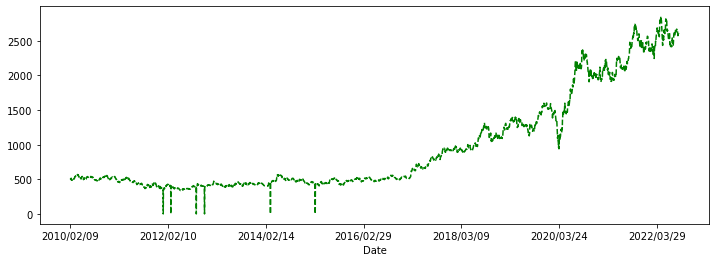

In [13]:
dff['High'].plot(figsize=(12,4),ls='--',c='green')

In [14]:
dff.index

Index(['2010/02/09', '2010/02/10', '2010/02/11', '2010/02/15', '2010/02/16',
       '2010/02/17', '2010/02/18', '2010/02/19', '2010/02/22', '2010/02/23',
       ...
       '2022/08/26', '2022/08/29', '2022/08/30', '2022/09/01', '2022/09/02',
       '2022/09/05', '2022/09/06', '2022/09/07', '2022/09/08', '2022/09/09'],
      dtype='object', name='Date', length=3113)

In [15]:
index=dff.loc['2022/08/19':'2022/09/09'].index
share_open=dff.loc['2022/08/19':'2022/09/09']['Open']

In [16]:
share_open

Date
2022/08/19    2650.000000
2022/08/22    2617.000000
2022/08/23    2594.000000
2022/08/24    2640.100098
2022/08/25    2648.949951
2022/08/26    2633.000000
2022/08/29    2585.000000
2022/08/30    2614.000000
2022/09/01    2582.649902
2022/09/02    2560.399902
2022/09/05    2531.000000
2022/09/06    2573.000000
2022/09/07    2575.000000
2022/09/08    2588.250000
2022/09/09    2610.000000
Name: Open, dtype: float64

In [17]:
index

Index(['2022/08/19', '2022/08/22', '2022/08/23', '2022/08/24', '2022/08/25',
       '2022/08/26', '2022/08/29', '2022/08/30', '2022/09/01', '2022/09/02',
       '2022/09/05', '2022/09/06', '2022/09/07', '2022/09/08', '2022/09/09'],
      dtype='object', name='Date')

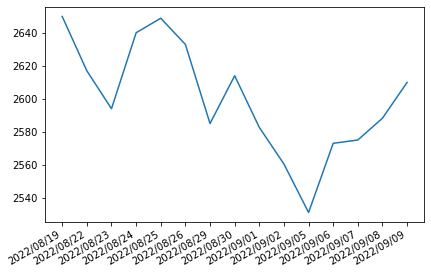

In [18]:
figure,axis=plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index,share_open)

In [19]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,...,EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD,BUY/SELL
0,2010/02/09,492.209351,494.314392,486.736237,491.961700,445.888885,6595770,77.363565,538.556974,482.723033,...,507.070528,526.112973,525.687818,-82.107805,-133.346702,-0.04683073594,32,88,-19.042446,0
1,2010/02/10,495.255463,495.255463,486.389526,487.924957,442.230225,8427562,77.450994,534.379680,480.362298,...,504.125055,523.284232,524.857180,-89.479146,-126.800124,-0.04131185583,28,84,-19.159176,-1
2,2010/02/11,489.980469,505.112030,489.609009,502.808868,455.720215,10822218,73.800489,529.706166,482.283331,...,503.922565,521.767538,524.114793,-50.645372,-81.142246,-0.02121195237,24,80,-17.844973,1
3,2010/02/15,508.678253,508.678253,499.069336,500.258057,453.408264,6229609,62.190715,526.939071,481.947695,...,503.358794,520.174243,523.763755,-56.976014,-62.805145,-0.03460143653,20,76,-16.815449,-1
4,2010/02/16,500.307587,505.706421,497.781525,504.096680,456.887390,4646498,59.535849,524.309725,482.857629,...,503.472315,518.983313,523.507625,-47.449261,-61.770626,-0.02644921791,16,72,-15.510997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3108,2022/09/05,2531.000000,2581.500000,2531.000000,2569.800049,2569.800049,5227785,58.195854,2691.671064,2541.343236,...,2592.431907,2579.893536,1019.179252,-70.833259,-92.978210,-0.01685255365,48,0,12.538371,1
3109,2022/09/06,2573.000000,2606.000000,2572.000000,2596.850098,2596.850098,5030172,58.608005,2687.970925,2537.264810,...,2593.111629,2581.149578,1019.470203,-50.692916,-29.493616,-0.003740504732,44,0,11.962051,1
3110,2022/09/07,2575.000000,2594.899902,2570.000000,2581.750000,2581.750000,3455942,58.895007,2681.110820,2532.210643,...,2591.363686,2581.194053,1019.668841,-61.157290,-53.368680,-0.02457686557,40,0,10.169633,0
3111,2022/09/08,2588.250000,2598.000000,2571.000000,2585.399902,2585.399902,3256840,60.656396,2670.549281,2531.929304,...,2590.446181,2581.505598,1019.856298,-58.627907,-54.556808,-0.02058910806,36,80,8.940583,0


In [20]:
df['Date']=pd.to_datetime(df['Date'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               3113 non-null   datetime64[ns]
 1   Open                               3113 non-null   float64       
 2   High                               3113 non-null   float64       
 3   Low                                3113 non-null   float64       
 4   Close                              3113 non-null   float64       
 5   Adj Close                          3113 non-null   float64       
 6   Volume                             3113 non-null   int64         
 7   RSI                                3113 non-null   float64       
 8   Upper Bollinger band               3113 non-null   float64       
 9   Lower Bollinger band               3113 non-null   float64       
 10  %K (5 days stochastic oscillator)  3

In [22]:
df=df.set_index('Date',drop=True)

In [23]:
df

,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,%K (5 days stochastic oscillator),...,EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD,BUY/SELL
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-09,492.209351,494.314392,486.736237,491.961700,445.888885,6595770,77.363565,538.556974,482.723033,24.863803,...,507.070528,526.112973,525.687818,-82.107805,-133.346702,-0.04683073594,32,88,-19.042446,0
2010-02-10,495.255463,495.255463,486.389526,487.924957,442.230225,8427562,77.450994,534.379680,480.362298,16.031785,...,504.125055,523.284232,524.857180,-89.479146,-126.800124,-0.04131185583,28,84,-19.159176,-1
2010-02-11,489.980469,505.112030,489.609009,502.808868,455.720215,10822218,73.800489,529.706166,482.283331,89.620565,...,503.922565,521.767538,524.114793,-50.645372,-81.142246,-0.02121195237,24,80,-17.844973,1
2010-02-15,508.678253,508.678253,499.069336,500.258057,453.408264,6229609,62.190715,526.939071,481.947695,67.307688,...,503.358794,520.174243,523.763755,-56.976014,-62.805145,-0.03460143653,20,76,-16.815449,-1
2010-02-16,500.307587,505.706421,497.781525,504.096680,456.887390,4646498,59.535849,524.309725,482.857629,79.444438,...,503.472315,518.983313,523.507625,-47.449261,-61.770626,-0.02644921791,16,72,-15.510997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-05,2531.000000,2581.500000,2531.000000,2569.800049,2569.800049,5227785,58.195854,2691.671064,2541.343236,34.106791,...,2592.431907,2579.893536,1019.179252,-70.833259,-92.978210,-0.01685255365,48,0,12.538371,1
2022-09-06,2573.000000,2606.000000,2572.000000,2596.850098,2596.850098,5030172,58.608005,2687.970925,2537.264810,59.514946,...,2593.111629,2581.149578,1019.470203,-50.692916,-29.493616,-0.003740504732,44,0,11.962051,1
2022-09-07,2575.000000,2594.899902,2570.000000,2581.750000,2581.750000,3455942,58.895007,2681.110820,2532.210643,69.800766,...,2591.363686,2581.194053,1019.668841,-61.157290,-53.368680,-0.02457686557,40,0,10.169633,0


In [24]:
datetime(2022,9,5)

datetime.datetime(2022, 9, 5, 0, 0)

In [25]:
datetime.now()

datetime.datetime(2022, 10, 3, 11, 39, 16, 856751)

In [26]:
##year and frequency
df.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,%K (5 days stochastic oscillator),...,EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD,BUY/SELL
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,458.181885,466.379181,453.204071,455.284363,415.462311,2668414,18.850900,489.505172,445.622261,2.610293,...,470.558270,480.169332,512.006711,-98.934486,-345.926449,-0.0005385733371,0,0,-19.159176,-1
2011-12-31,353.152466,356.892029,341.265137,343.221588,315.867767,2838132,26.049668,380.713739,342.441891,2.821355,...,364.565248,374.871631,477.885334,-98.068983,-256.370228,-0.0009212251502,0,0,-16.543351,-1
2012-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0,3.532784,349.242536,151.923808,0.000000,...,302.954241,340.654569,451.821631,-100.000000,-687.986684,#DIV/0!,0,0,-37.700329,#DIV/0!
2013-12-31,379.898926,385.322540,378.363495,380.171356,354.134918,2297148,18.343631,396.575842,369.396161,1.486142,...,388.487352,394.908721,445.492305,-98.615743,-208.693703,-0.0004165024519,0,0,-9.602279,-1
2014-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0,5.208284,406.479849,183.504878,0.000000,...,366.777999,392.720628,444.571800,-100.000000,-659.155879,#DIV/0!,0,0,-25.942629,#DIV/0!
2015-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0,7.979924,431.411575,182.310227,0.000000,...,364.605090,404.755025,449.520002,-100.000000,-679.083987,#DIV/0!,0,0,-40.149935,#DIV/0!
2016-12-31,454.690002,462.565338,439.880371,449.018738,431.726685,1840098,11.584058,482.605484,440.842250,3.690647,...,471.345052,478.029749,450.996090,-98.091966,-243.849220,-0.0002434070797,0,0,-10.917454,-1
2017-12-31,503.725189,509.569794,501.644897,503.180359,488.825897,1617344,8.866594,521.446092,468.551091,2.712319,...,512.520966,515.407720,458.324934,-98.072758,-178.695481,-0.00004840069351,0,0,-5.378199,-1
2018-12-31,868.764954,887.437988,862.821289,874.411438,855.695740,1296168,2.965484,905.336088,858.659539,2.366019,...,890.896845,899.078102,494.788265,-97.633981,-377.114692,-0.0005555202189,0,0,-41.108977,-1


In [27]:
df.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,%K (5 days stochastic oscillator),...,EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD,BUY/SELL
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,567.124207,569.452148,556.277039,559.546082,507.143890,33257378,86.759377,570.166377,530.535813,97.813670,...,548.833451,537.405592,525.687818,-0.990574,208.038365,0.1249864393,96,96,12.072988,1
2011-12-31,535.573303,540.575867,532.229980,537.703125,490.672150,41037923,88.489197,545.353559,516.556299,97.774502,...,526.568952,521.496707,513.829973,-2.132175,241.816220,0.1262858348,96,96,9.312678,1
2012-12-31,431.014404,436.660889,421.653137,432.772736,403.133850,19581744,97.768657,617.653558,405.667863,99.621113,...,413.062486,404.845191,477.640552,-0.467075,293.613467,0.1460831214,96,96,16.784545,1
2013-12-31,464.645630,473.016266,454.714752,457.513245,430.920563,22213692,78.774586,469.620311,435.131991,97.526904,...,444.796610,438.483193,451.804521,-2.100437,319.183238,0.1103613132,96,96,12.574695,1
2014-12-31,560.932922,567.248047,550.828674,558.431641,530.759766,25570753,92.209575,693.555853,524.896378,99.129583,...,543.303792,530.754789,450.810604,-0.253972,468.939103,0.1829222691,96,96,23.862972,1
2015-12-31,521.803833,528.911438,515.711548,520.268372,500.232422,22846211,94.879871,642.926277,489.469514,100.000000,...,505.417519,495.668802,450.984789,-1.574789,372.280578,0.1452431401,96,96,15.106538,1
2016-12-31,553.255676,559.471741,548.104492,550.184814,534.489441,33136776,90.189341,558.918689,529.173360,96.470518,...,541.277108,533.282864,458.305543,-2.020181,264.343112,0.09693046863,96,96,12.169800,1
2017-12-31,946.973633,950.490295,938.503906,943.605591,923.408875,58759604,73.928065,977.320408,903.112524,98.375320,...,923.655108,911.391880,494.671155,-1.363642,392.555675,0.2137146239,96,96,32.833990,1
2018-12-31,1303.939941,1316.520752,1282.839966,1306.614624,1286.533325,26144187,85.137272,1314.809427,1201.936065,97.918037,...,1245.773740,1221.674758,557.383336,-1.623614,258.363915,0.1545701447,96,96,50.163590,1


<AxesSubplot:xlabel='Date'>

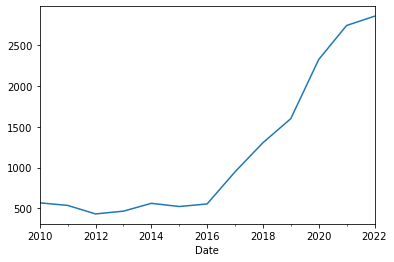

In [28]:
df.resample(rule='A').max()['Open'].plot()

In [29]:
##Quaterly start frequency
df.resample(rule='QS').max()

,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,%K (5 days stochastic oscillator),...,EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD,BUY/SELL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,546.668152,550.283875,542.433289,545.058411,494.013153,15690402,77.450994,563.154976,500.124956,95.352170,...,531.625811,526.112973,525.687818,-3.417659,208.038365,0.1020346312,96,96,9.970417,1
2010-04-01,567.124207,569.452148,556.277039,559.546082,507.143890,33257378,74.170104,570.166377,530.535813,97.547077,...,548.833451,537.405592,523.367644,-2.180335,204.103979,0.06764349097,96,96,12.072988,1
2010-07-01,536.910645,542.086548,529.035278,533.072021,486.446075,24425854,84.255319,540.874031,519.290668,95.901598,...,529.062279,525.364999,520.480868,-2.074068,178.110832,0.1249864393,96,96,5.989083,1
2010-10-01,555.236938,557.168579,545.107910,550.704895,502.536835,17201550,86.759377,563.295223,528.004964,97.813670,...,540.332816,531.088409,514.663648,-0.990574,190.470070,0.07638391363,96,96,10.824394,1
2011-01-01,535.573303,540.575867,532.229980,537.703125,490.672150,41037923,84.573506,545.353559,516.556299,97.774502,...,526.568952,521.496707,513.829973,-2.132175,241.816220,0.0889751685,96,96,9.008401,1
2011-04-01,521.308533,527.945618,515.117188,520.392212,474.875336,16481230,81.726762,528.713053,497.760573,93.467918,...,512.187377,504.751380,507.822781,-12.603636,116.959997,0.06094114076,96,96,8.503405,1
2011-07-01,449.241638,449.241638,435.447388,437.280029,402.430054,17773749,88.489197,456.625298,419.784873,95.882692,...,435.800892,444.650084,502.293119,-3.524198,216.674217,0.1262858348,96,96,5.234773,1
2011-10-01,448.251038,448.251038,437.899139,445.774506,410.247559,13450964,82.825920,457.012725,415.688852,97.613860,...,431.314833,423.318643,487.781357,-2.156155,184.797937,0.09348109081,96,96,9.312678,1
2012-01-01,424.352570,428.290222,418.532715,425.169800,391.284973,18672849,92.091431,581.978144,403.891108,99.621113,...,412.651520,402.552730,477.640552,-0.918745,140.374303,0.1460831214,96,96,16.784545,1


<AxesSubplot:xlabel='Date'>

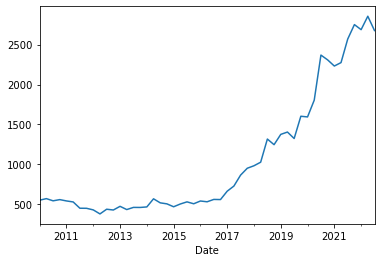

In [30]:
df.resample(rule='QS').max()['High'].plot()

In [31]:
##business and frequency (BUSINESS YEAR END)
df.resample(rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,%K (5 days stochastic oscillator),...,EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD,BUY/SELL
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,567.124207,569.452148,556.277039,559.546082,507.143890,33257378,86.759377,570.166377,530.535813,97.813670,...,548.833451,537.405592,525.687818,-0.990574,208.038365,0.1249864393,96,96,12.072988,1
2011-12-30,535.573303,540.575867,532.229980,537.703125,490.672150,41037923,88.489197,545.353559,516.556299,97.774502,...,526.568952,521.496707,513.829973,-2.132175,241.816220,0.1262858348,96,96,9.312678,1
2012-12-31,431.014404,436.660889,421.653137,432.772736,403.133850,19581744,97.768657,617.653558,405.667863,99.621113,...,413.062486,404.845191,477.640552,-0.467075,293.613467,0.1460831214,96,96,16.784545,1
2013-12-31,464.645630,473.016266,454.714752,457.513245,430.920563,22213692,78.774586,469.620311,435.131991,97.526904,...,444.796610,438.483193,451.804521,-2.100437,319.183238,0.1103613132,96,96,12.574695,1
2014-12-31,560.932922,567.248047,550.828674,558.431641,530.759766,25570753,92.209575,693.555853,524.896378,99.129583,...,543.303792,530.754789,450.810604,-0.253972,468.939103,0.1829222691,96,96,23.862972,1
2015-12-31,521.803833,528.911438,515.711548,520.268372,500.232422,22846211,94.879871,642.926277,489.469514,100.000000,...,505.417519,495.668802,450.984789,-1.574789,372.280578,0.1452431401,96,96,15.106538,1
2016-12-30,553.255676,559.471741,548.104492,550.184814,534.489441,33136776,90.189341,558.918689,529.173360,96.470518,...,541.277108,533.282864,458.305543,-2.020181,264.343112,0.09693046863,96,96,12.169800,1
2017-12-29,946.973633,950.490295,938.503906,943.605591,923.408875,58759604,73.928065,977.320408,903.112524,98.375320,...,923.655108,911.391880,494.671155,-1.363642,392.555675,0.2137146239,96,96,32.833990,1
2018-12-31,1303.939941,1316.520752,1282.839966,1306.614624,1286.533325,26144187,85.137272,1314.809427,1201.936065,97.918037,...,1245.773740,1221.674758,557.383336,-1.623614,258.363915,0.1545701447,96,96,50.163590,1


In [32]:
##business quarters
df.resample(rule='BQS').max()

,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,%K (5 days stochastic oscillator),...,EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD,BUY/SELL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,546.668152,550.283875,542.433289,545.058411,494.013153,15690402,77.450994,563.154976,500.124956,95.352170,...,531.625811,526.112973,525.687818,-3.417659,208.038365,0.1020346312,96,96,9.970417,1
2010-04-01,567.124207,569.452148,556.277039,559.546082,507.143890,33257378,74.170104,570.166377,530.535813,97.547077,...,548.833451,537.405592,523.367644,-2.180335,204.103979,0.06764349097,96,96,12.072988,1
2010-07-01,536.910645,542.086548,529.035278,533.072021,486.446075,24425854,84.255319,540.874031,519.290668,95.901598,...,529.062279,525.364999,520.480868,-2.074068,178.110832,0.1249864393,96,96,5.989083,1
2010-10-01,555.236938,557.168579,545.107910,550.704895,502.536835,17201550,86.759377,563.295223,528.004964,97.813670,...,540.332816,531.088409,514.663648,-0.990574,190.470070,0.07638391363,96,96,10.824394,1
2011-01-03,535.573303,540.575867,532.229980,537.703125,490.672150,41037923,84.573506,545.353559,516.556299,97.774502,...,526.568952,521.496707,513.829973,-2.132175,241.816220,0.0889751685,96,96,9.008401,1
2011-04-01,521.308533,527.945618,515.117188,520.392212,474.875336,16481230,81.726762,528.713053,497.760573,93.467918,...,512.187377,504.751380,507.822781,-12.603636,116.959997,0.06094114076,96,96,8.503405,1
2011-07-01,449.241638,449.241638,435.447388,437.280029,402.430054,17773749,88.489197,456.625298,419.784873,95.882692,...,435.800892,444.650084,502.293119,-3.524198,216.674217,0.1262858348,96,96,5.234773,1
2011-10-03,448.251038,448.251038,437.899139,445.774506,410.247559,13450964,82.825920,457.012725,415.688852,97.613860,...,431.314833,423.318643,487.781357,-2.156155,184.797937,0.09348109081,96,96,9.312678,1
2012-01-02,424.352570,428.290222,418.532715,425.169800,391.284973,18672849,92.091431,581.978144,403.891108,99.621113,...,412.651520,402.552730,477.640552,-0.918745,140.374303,0.1460831214,96,96,16.784545,1


<AxesSubplot:xlabel='Date'>

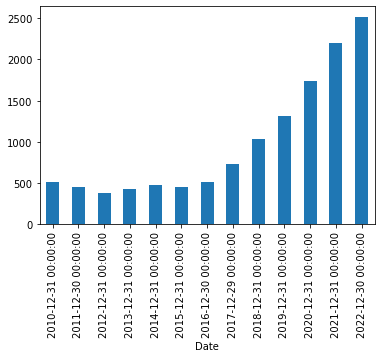

In [33]:
df['Open'].resample(rule='BA').mean().plot(kind='bar')

In [34]:
df['Open'].resample(rule='M').mean() ##monthly

Date
2010-02-28     493.720029
2010-03-31     518.651562
2010-04-30     538.988425
2010-05-31     508.828006
2010-06-30     518.278151
                 ...     
2022-05-31    2572.945219
2022-06-30    2624.993186
2022-07-31    2439.340472
2022-08-31    2606.609998
2022-09-30    2574.328543
Freq: M, Name: Open, Length: 152, dtype: float64

<AxesSubplot:xlabel='Date'>

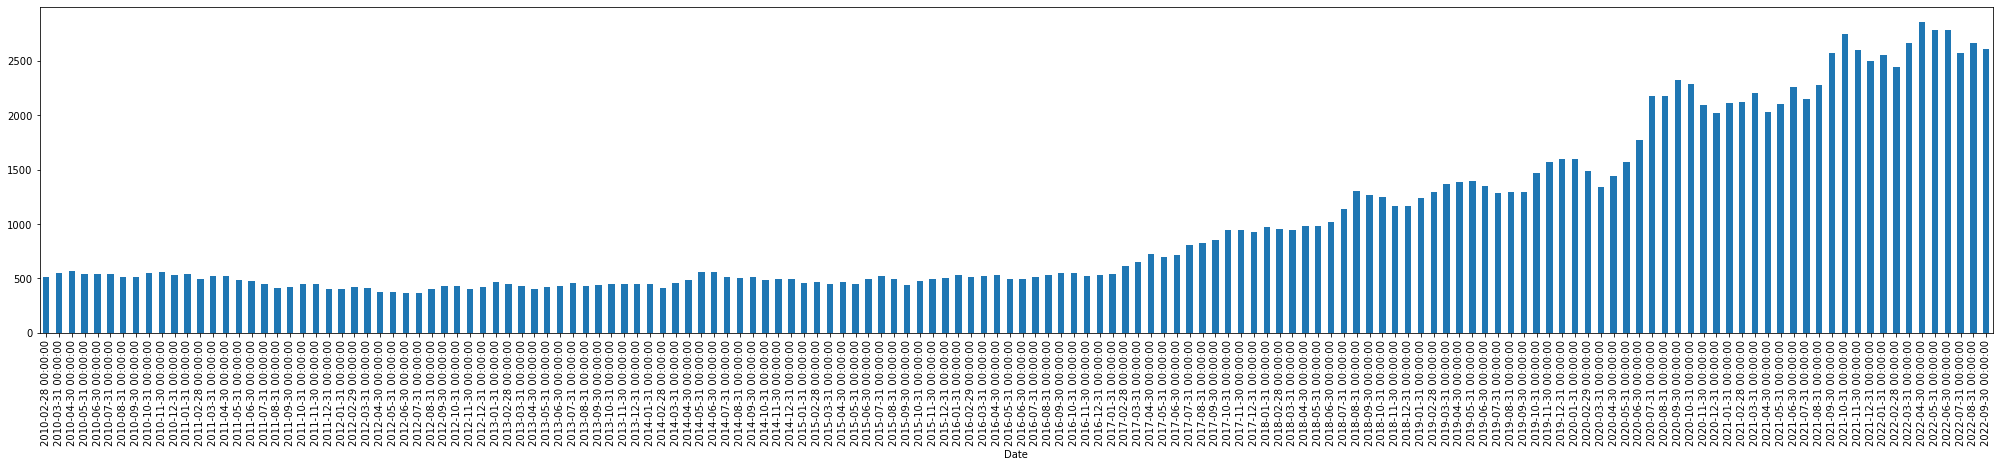

In [35]:
plt.tight_layout()
df['Open'].resample(rule='M').max().plot(kind='bar',figsize=(35,6))

In [36]:
df['High'].rolling(10).mean().head(20)

Date
2010-02-09           NaN
2010-02-10           NaN
2010-02-11           NaN
2010-02-15           NaN
2010-02-16           NaN
2010-02-17           NaN
2010-02-18           NaN
2010-02-19           NaN
2010-02-22           NaN
2010-02-23    501.241232
2010-02-24    500.632007
2010-02-25    499.894003
2010-02-26    498.665649
2010-03-02    497.278793
2010-03-03    497.625507
2010-03-04    497.734473
2010-03-05    497.122772
2010-03-08    498.707748
2010-03-09    499.292209
2010-03-10    501.070352
Name: High, dtype: float64

In [37]:
df['Open:10days rolling']=df['Open'].rolling(30).mean()
df['Open:30days rolling']=df['Open'].rolling(40).mean()
df['Open:50days rolling']=df['Open'].rolling(50).mean()

<AxesSubplot:xlabel='Date'>

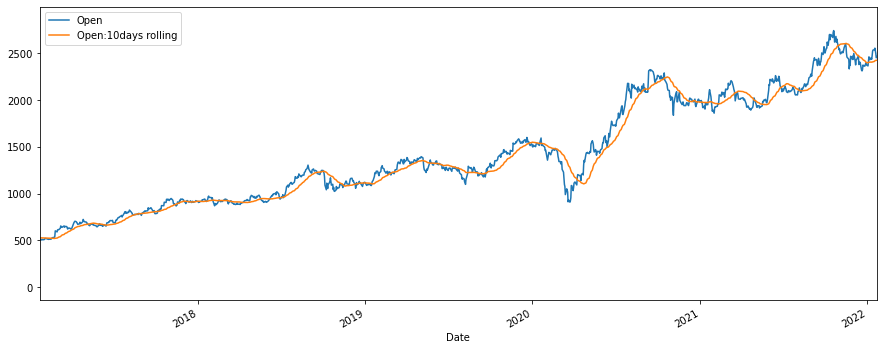

In [38]:
df[['Open','Open:10days rolling']].plot(xlim=['2017-01-20','2022-01-22' ],figsize=(15,6))

<AxesSubplot:xlabel='Date'>

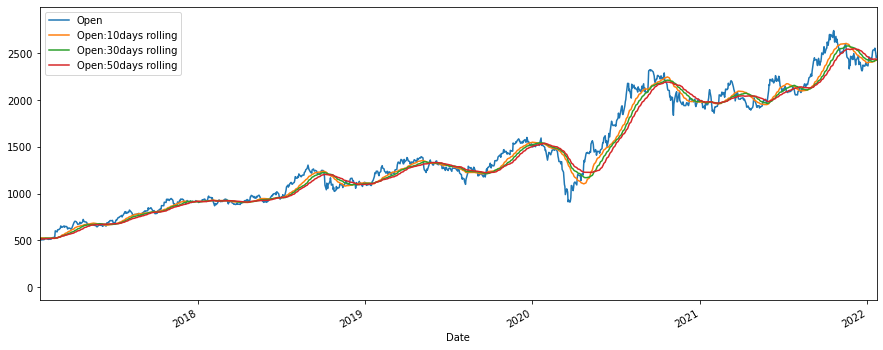

In [39]:
df[['Open','Open:10days rolling','Open:30days rolling','Open:50days rolling']].plot(xlim=['2017-01-20','2022-01-22' ],figsize=(15,6))

<AxesSubplot:xlabel='Date'>

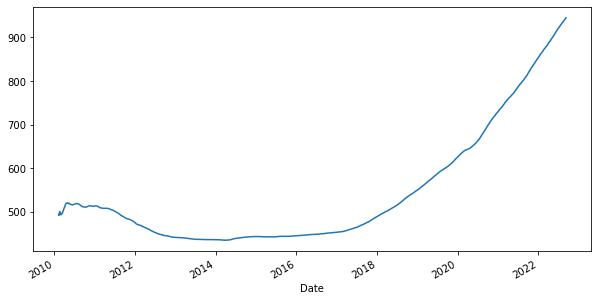

In [40]:
##expanding  CMA cumulative moving average of the open stock wrt different years
df['Open'].expanding().mean().plot(figsize=(10,5))

In [41]:
##EWMA- Exponential Weighted Moving average, SMOOTHING FACTOR - 0.1
df['EMA_5days']=df['Open'].ewm(span=5).mean()

<AxesSubplot:xlabel='Date'>

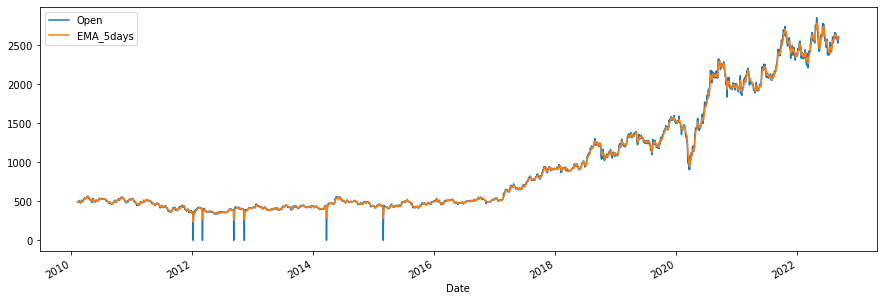

In [42]:
df[['Open','EMA_5days']].plot(figsize=(15,5))

In [43]:
outliers=[]
def detect_outliers(df):
    threshold=3
    mean=np.mean(df)
    std=np.std(df)
    
    for i in df:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [44]:
dataset=df[['RSI','Upper Bollinger band','Lower Bollinger band','%K (5 days stochastic oscillator)','EMA 12','EMA 26','Volume Weighted Average Price','William % R','Commodity Channel Index','Rate of Change (10 days)','Aroon Up','Aroon Down','MACD']]

In [45]:
dataset

,RSI,Upper Bollinger band,Lower Bollinger band,%K (5 days stochastic oscillator),EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD
Date,,,,,,,,,,,,,
2010-02-09,77.363565,538.556974,482.723033,24.863803,507.070528,526.112973,525.687818,-82.107805,-133.346702,-0.04683073594,32,88,-19.042446
2010-02-10,77.450994,534.379680,480.362298,16.031785,504.125055,523.284232,524.857180,-89.479146,-126.800124,-0.04131185583,28,84,-19.159176
2010-02-11,73.800489,529.706166,482.283331,89.620565,503.922565,521.767538,524.114793,-50.645372,-81.142246,-0.02121195237,24,80,-17.844973
2010-02-15,62.190715,526.939071,481.947695,67.307688,503.358794,520.174243,523.763755,-56.976014,-62.805145,-0.03460143653,20,76,-16.815449
2010-02-16,59.535849,524.309725,482.857629,79.444438,503.472315,518.983313,523.507625,-47.449261,-61.770626,-0.02644921791,16,72,-15.510997
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-05,58.195854,2691.671064,2541.343236,34.106791,2592.431907,2579.893536,1019.179252,-70.833259,-92.978210,-0.01685255365,48,0,12.538371
2022-09-06,58.608005,2687.970925,2537.264810,59.514946,2593.111629,2581.149578,1019.470203,-50.692916,-29.493616,-0.003740504732,44,0,11.962051
2022-09-07,58.895007,2681.110820,2532.210643,69.800766,2591.363686,2581.194053,1019.668841,-61.157290,-53.368680,-0.02457686557,40,0,10.169633


In [46]:
X=np.array(dataset['RSI']).reshape(-1,1)
Y=np.array(dataset['Upper Bollinger band']).reshape(-1,1)
X=np.array(dataset['Lower Bollinger band']).reshape(-1,1)
X=np.array(dataset['%K (5 days stochastic oscillator)']).reshape(-1,1)
X=np.array(dataset['EMA 12']).reshape(-1,1)
X=np.array(dataset['EMA 26']).reshape(-1,1)
X=np.array(dataset['Volume Weighted Average Price']).reshape(-1,1)
X=np.array(dataset['William % R']).reshape(-1,1)
X=np.array(dataset['Commodity Channel Index']).reshape(-1,1)
X=np.array(dataset['Rate of Change (10 days)']).reshape(-1,1)
X=np.array(dataset['Aroon Up']).reshape(-1,1)
X=np.array(dataset['Aroon Down']).reshape(-1,1)
X=np.array(dataset['MACD']).reshape(-1,1)

In [47]:
#define a function called "plot_boxplot"
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

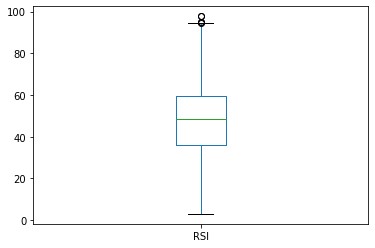

In [48]:
plot_boxplot(df,"RSI")

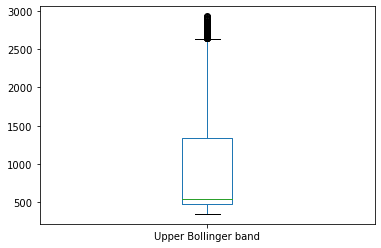

In [49]:
plot_boxplot(df,"Upper Bollinger band")

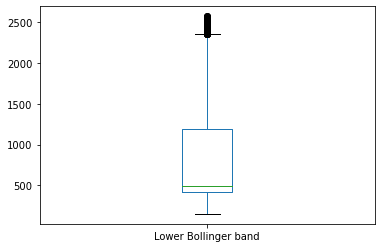

In [50]:
plot_boxplot(df,"Lower Bollinger band")

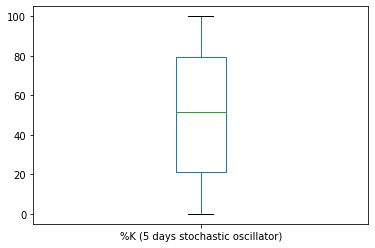

In [51]:
plot_boxplot(df,"%K (5 days stochastic oscillator)")

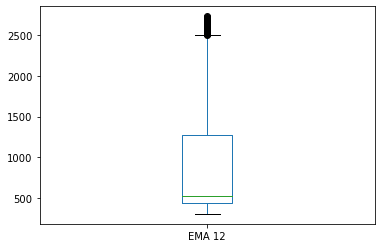

In [52]:
plot_boxplot(df,"EMA 12")

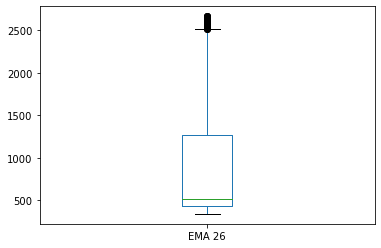

In [53]:
plot_boxplot(df,"EMA 26")

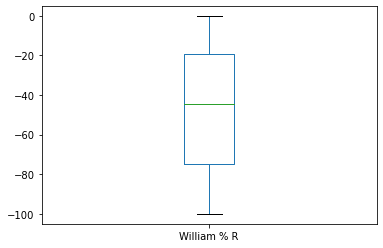

In [54]:
plot_boxplot(df,"William % R")

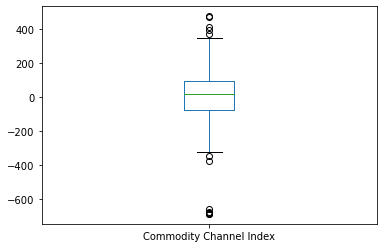

In [55]:
plot_boxplot(df,"Commodity Channel Index")

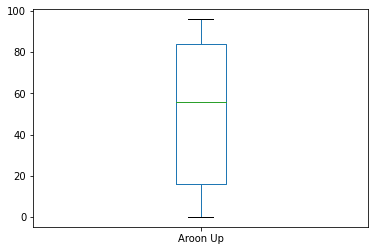

In [56]:
plot_boxplot(df,"Aroon Up")

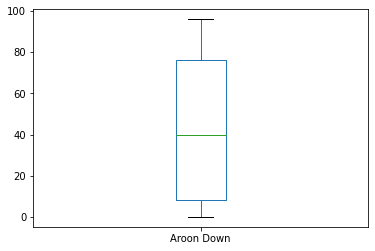

In [57]:
plot_boxplot(df,"Aroon Down")

In [58]:
def outliers(df,ft):
    q1=df[ft].quantile(0.25)
    q3=df[ft].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR
    ls=df.index[(df[ft]<=lower_bound)| (df[ft]>=upper_bound)]
    return ls

In [59]:
index_list=[]
for feature in ['RSI','Upper Bollinger band','Lower Bollinger band','%K (5 days stochastic oscillator)','%D Average(H,3)','EMA 12','EMA 26','Volume Weighted Average Price','William % R','Commodity Channel Index','Aroon Up','Aroon Down','MACD']:
    index_list.extend(outliers(df,feature))

In [60]:
index_list

[Timestamp('2012-09-08 00:00:00'),
 Timestamp('2012-11-11 00:00:00'),
 Timestamp('2012-11-12 00:00:00'),
 Timestamp('2015-02-28 00:00:00'),
 Timestamp('2015-03-02 00:00:00'),
 Timestamp('2021-10-07 00:00:00'),
 Timestamp('2021-10-08 00:00:00'),
 Timestamp('2021-10-11 00:00:00'),
 Timestamp('2021-10-12 00:00:00'),
 Timestamp('2021-10-13 00:00:00'),
 Timestamp('2021-10-14 00:00:00'),
 Timestamp('2021-10-18 00:00:00'),
 Timestamp('2021-10-19 00:00:00'),
 Timestamp('2021-10-20 00:00:00'),
 Timestamp('2021-10-21 00:00:00'),
 Timestamp('2021-10-22 00:00:00'),
 Timestamp('2021-10-25 00:00:00'),
 Timestamp('2021-10-26 00:00:00'),
 Timestamp('2021-10-27 00:00:00'),
 Timestamp('2021-10-28 00:00:00'),
 Timestamp('2021-10-29 00:00:00'),
 Timestamp('2021-11-01 00:00:00'),
 Timestamp('2021-11-02 00:00:00'),
 Timestamp('2021-11-03 00:00:00'),
 Timestamp('2021-11-04 00:00:00'),
 Timestamp('2021-11-08 00:00:00'),
 Timestamp('2021-11-09 00:00:00'),
 Timestamp('2021-11-10 00:00:00'),
 Timestamp('2021-11-

In [61]:
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [62]:
df_clean=remove(df,index_list)

In [63]:
df_clean.shape

(2410, 25)

In [64]:
df.shape

(3113, 25)

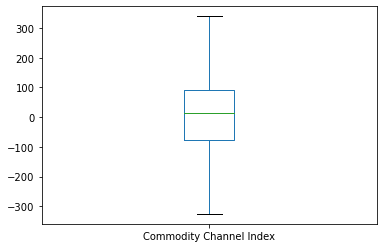

In [65]:
plot_boxplot(df_clean,"Commodity Channel Index")

In [66]:
#Normalization 

In [67]:
df_clean.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI',
       'Upper Bollinger band', 'Lower Bollinger band',
       '%K (5 days stochastic oscillator)', '%D Average(H,3)', 'EMA 12',
       'EMA 26', 'Volume Weighted Average Price', 'William % R',
       'Commodity Channel Index', 'Rate of Change (10 days)', 'Aroon Up',
       'Aroon Down', 'MACD', 'BUY/SELL', 'Open:10days rolling',
       'Open:30days rolling', 'Open:50days rolling', 'EMA_5days'],
      dtype='object')

In [68]:
X_data=df_clean[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI',
       'Upper Bollinger band', 'Lower Bollinger band',
       '%K (5 days stochastic oscillator)', '%D Average(H,3)', 'EMA 12',
       'EMA 26', 'Volume Weighted Average Price', 'William % R',
       'Commodity Channel Index', 'Aroon Up',
       'Aroon Down', 'MACD']]

In [69]:
X_data=X_data.apply(lambda x: (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0)))

In [70]:
X_data

,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,%K (5 days stochastic oscillator),"%D Average(H,3)",EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Aroon Up,Aroon Down,MACD
Date,,,,,,,,,,,,,,,,,,,
2010-02-09,0.080729,0.079216,0.079256,0.080449,0.070072,0.100166,0.812378,0.092643,0.162802,0.237303,0.120853,0.097766,0.097344,0.221709,0.170517,0.288987,0.333333,0.916667,0.162694
2010-02-10,0.082286,0.079694,0.079077,0.078381,0.068211,0.127984,0.813332,0.090598,0.161640,0.147651,0.165053,0.096239,0.095839,0.219439,0.095818,0.298828,0.291667,0.875000,0.160832
2010-02-11,0.079589,0.084695,0.080741,0.086004,0.075075,0.164351,0.773471,0.088311,0.162586,0.894640,0.192177,0.096134,0.095033,0.217410,0.489348,0.367458,0.250000,0.833333,0.181793
2010-02-15,0.089150,0.086505,0.085629,0.084697,0.073899,0.094605,0.646700,0.086957,0.162421,0.668145,0.421244,0.095841,0.094185,0.216450,0.425195,0.395022,0.208333,0.791667,0.198213
2010-02-16,0.084870,0.084997,0.084964,0.086663,0.075669,0.070564,0.617711,0.085671,0.162869,0.791343,0.568925,0.095900,0.093552,0.215750,0.521736,0.396577,0.166667,0.750000,0.219018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-20,0.943242,0.941141,0.939927,0.932603,0.933448,0.129534,0.616183,0.952369,0.984348,0.009329,0.061381,0.981957,0.993463,0.991163,0.012799,0.201198,0.041667,1.000000,0.479732
2020-10-21,0.937617,0.940633,0.911763,0.916574,0.917619,0.238867,0.705054,0.955749,0.973232,0.126684,0.033040,0.974977,0.990049,0.993634,0.118003,0.174587,0.000000,1.000000,0.367429
2020-10-22,0.916857,0.910443,0.908275,0.907535,0.908693,0.215878,0.714481,0.959074,0.961570,0.099335,0.073290,0.967662,0.986193,0.995818,0.063346,0.161837,0.000000,1.000000,0.258114


In [88]:
fig = go.Figure(go.Bar(x=df.Date, y=df.Volume, name='Volume', marker_color='red'))
fig.show()

AttributeError: 'DataFrame' object has no attribute 'Date'

In [ ]:
fig = go.Figure([go.Ohlc(x=df.Date,
                         open=df.Open,
                         high=df.High,
                         low=df.Low,
                         close=df.Close)])
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()